In [1]:
import numpy as np
import tensorflow.keras as tfk
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils.np_utils import to_categorical
from tensorflow.keras.datasets import mnist

Using TensorFlow backend.


In [2]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


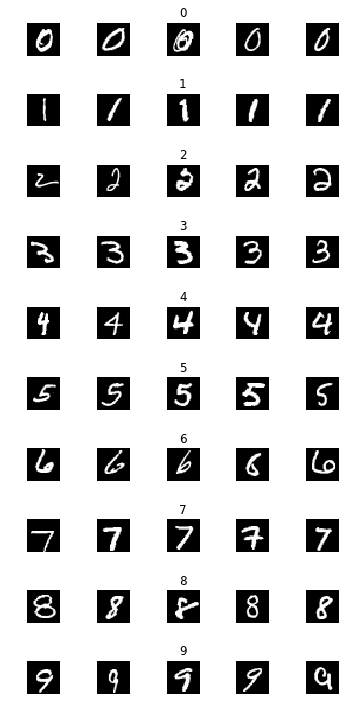

In [4]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axes = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axes[j][i].imshow(x_selected[np.random.randint(1, len(x_selected)-1)], cmap=plt.get_cmap("gray"))
        axes[j][i].axis("off")
        if i == 2:
            axes[j][i].set_title(str(j))

In [5]:
num, count = np.unique(y_test, return_counts=True)

In [6]:
{n: c for n, c in zip(num, count)}

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

<BarContainer object of 10 artists>

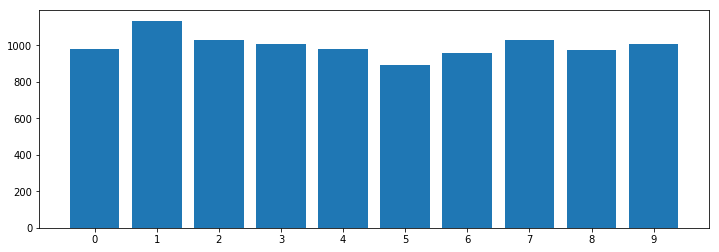

In [7]:
plt.figure(figsize=(12, 4))
plt.xticks(range(10))
plt.bar(num, count)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [72]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation="relu"))
    model.add(Dense(30,activation="sigmoid")),
    model.add(Dense(10,activation="sigmoid")),

    model.add(Dense(num_classes, activation="softmax",))
    model.compile(Adam(lr=.02), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [73]:
model = create_model()

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(X_train, y_train, validation_split=.1, batch_size=200, epochs=10, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 26us/sample - loss: 0.7303 - accuracy: 0.7928 - val_loss: 0.3251 - val_accuracy: 0.9128
Epoch 2/10
54000/54000 [==============================] - 1s 23us/sample - loss: 0.3646 - accuracy: 0.8996 - val_loss: 0.2799 - val_accuracy: 0.9238
Epoch 3/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.3325 - accuracy: 0.9075 - val_loss: 0.2671 - val_accuracy: 0.9227
Epoch 4/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.3050 - accuracy: 0.9146 - val_loss: 0.2458 - val_accuracy: 0.9317
Epoch 5/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.2931 - accuracy: 0.9170 - val_loss: 0.2359 - val_accuracy: 0.9310
Epoch 6/10
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2856 - accuracy: 0.9188 - val_loss: 0.2423 - val_accuracy: 0.9347
Epoch 7/10
54000/54000 [==============================] -

Text(0.5,0,'epoch')

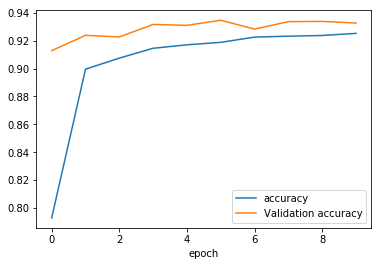

In [76]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy", "Validation accuracy"])
plt.xlabel("epoch")

In [77]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2734 - accuracy: 0.9197


In [78]:
import requests
url = "https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png"
response = requests.get(url, stream=True)

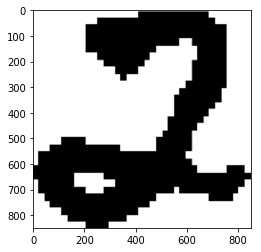

In [79]:
from PIL import Image
img = Image.open(response.raw)
plt.imshow(img)

In [80]:
img_array = np.asarray(img,)

In [81]:
import cv2
resized = cv2.resize(img_array,(28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

In [82]:
image = cv2.bitwise_not(gray_scale)

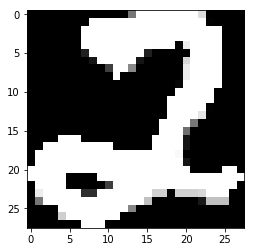

In [83]:
plt.imshow(image, cmap="gray")

In [84]:
image = image/255
image = image.reshape(1,784 )
prediction = model.predict_classes(image)

In [85]:
prediction

array([2], dtype=int64)